In [6]:
from utilities import *

<class 'numpy.ndarray'>
Image shape: (300, 400)
Data type: float64


c:\Users\ninor\Documents\cours\n7\2A\TI\epd\src\utilities.py:18: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image)
c:\Users\ninor\Documents\cours\n7\2A\TI\epd\src\utilities.py:19: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


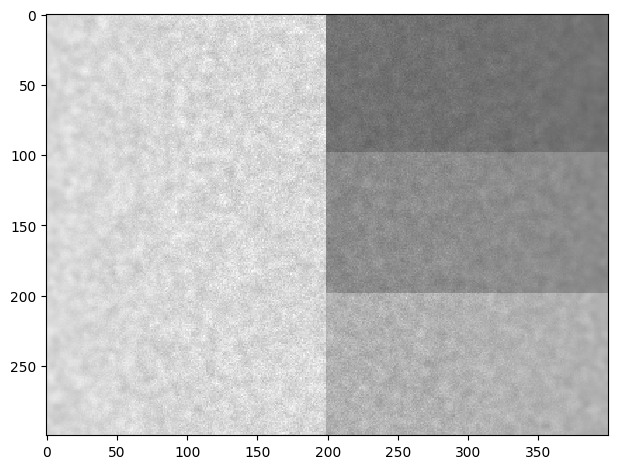

In [5]:
IMAGE_PATH = "../data/image.png"

image = load_image(IMAGE_PATH, gray=True, verbose=True)